In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statistics as stat


In [43]:
# loading dataset into variable df
df = pd.read_csv('E:\\datascience packages\\multi linear regression\\Computer_Data.csv')
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [3]:
df.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [4]:
df = df.set_index(df.columns[0])
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
Unnamed: 0,,,,,,,,,,
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1


In [5]:
############################ creating dummy for categorical data #############################
new_df = pd.get_dummies(df,columns = ['cd','multi','premium'], drop_first = True)
new_df.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
Unnamed: 0,,,,,,,,,,
1,1499,25,80,4,14,94,1,0,0,1
2,1795,33,85,2,14,94,1,0,0,1
3,1595,25,170,4,15,94,1,0,0,1
4,1849,25,170,8,14,94,1,0,0,0
5,3295,33,340,16,14,94,1,0,0,1


In [6]:
new_df.describe()
# finding basic mean, median, 

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985,0.464611,0.139479,0.902221
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984,0.498786,0.346474,0.297040
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000,0.000000,0.000000,1.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000,1.000000,0.000000,1.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000


In [ ]:

var_df = new_df.loc[:,:].var()
print('finding variance of: ')
print(var_df) # finding variance to each columns

IndexError: index 3 is out of bounds for axis 0 with size 3

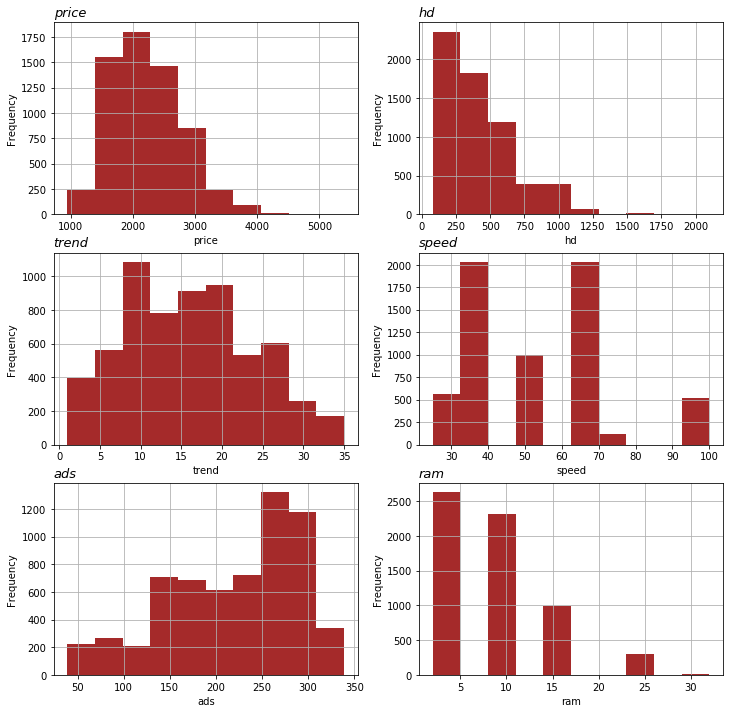

In [7]:
hist_plot = list(set(new_df.columns).difference(set(['multi_yes','cd_yes','premium_yes'])))
i,j = 0,0
f, axes = plt.subplots(3, 2, figsize = (12,12))
for column in hist_plot:
    f = new_df[column].hist(color = 'brown', ax = axes[i,j])
    axes[i,j].set_title(column, style = 'italic', loc = 'left', fontsize = 13)
    axes[i,j].set_xlabel(column, size = 10)
    axes[i,j].set_ylabel('Frequency', size = 10)
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

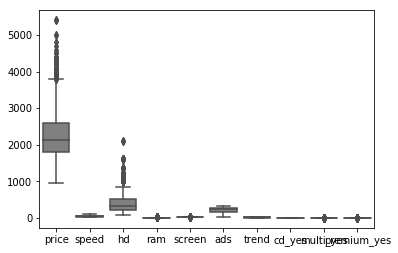

In [8]:
#--------------------- boxplot plot diagram --------------------------------------------------
sns.boxplot(data = new_df, color= 'grey')

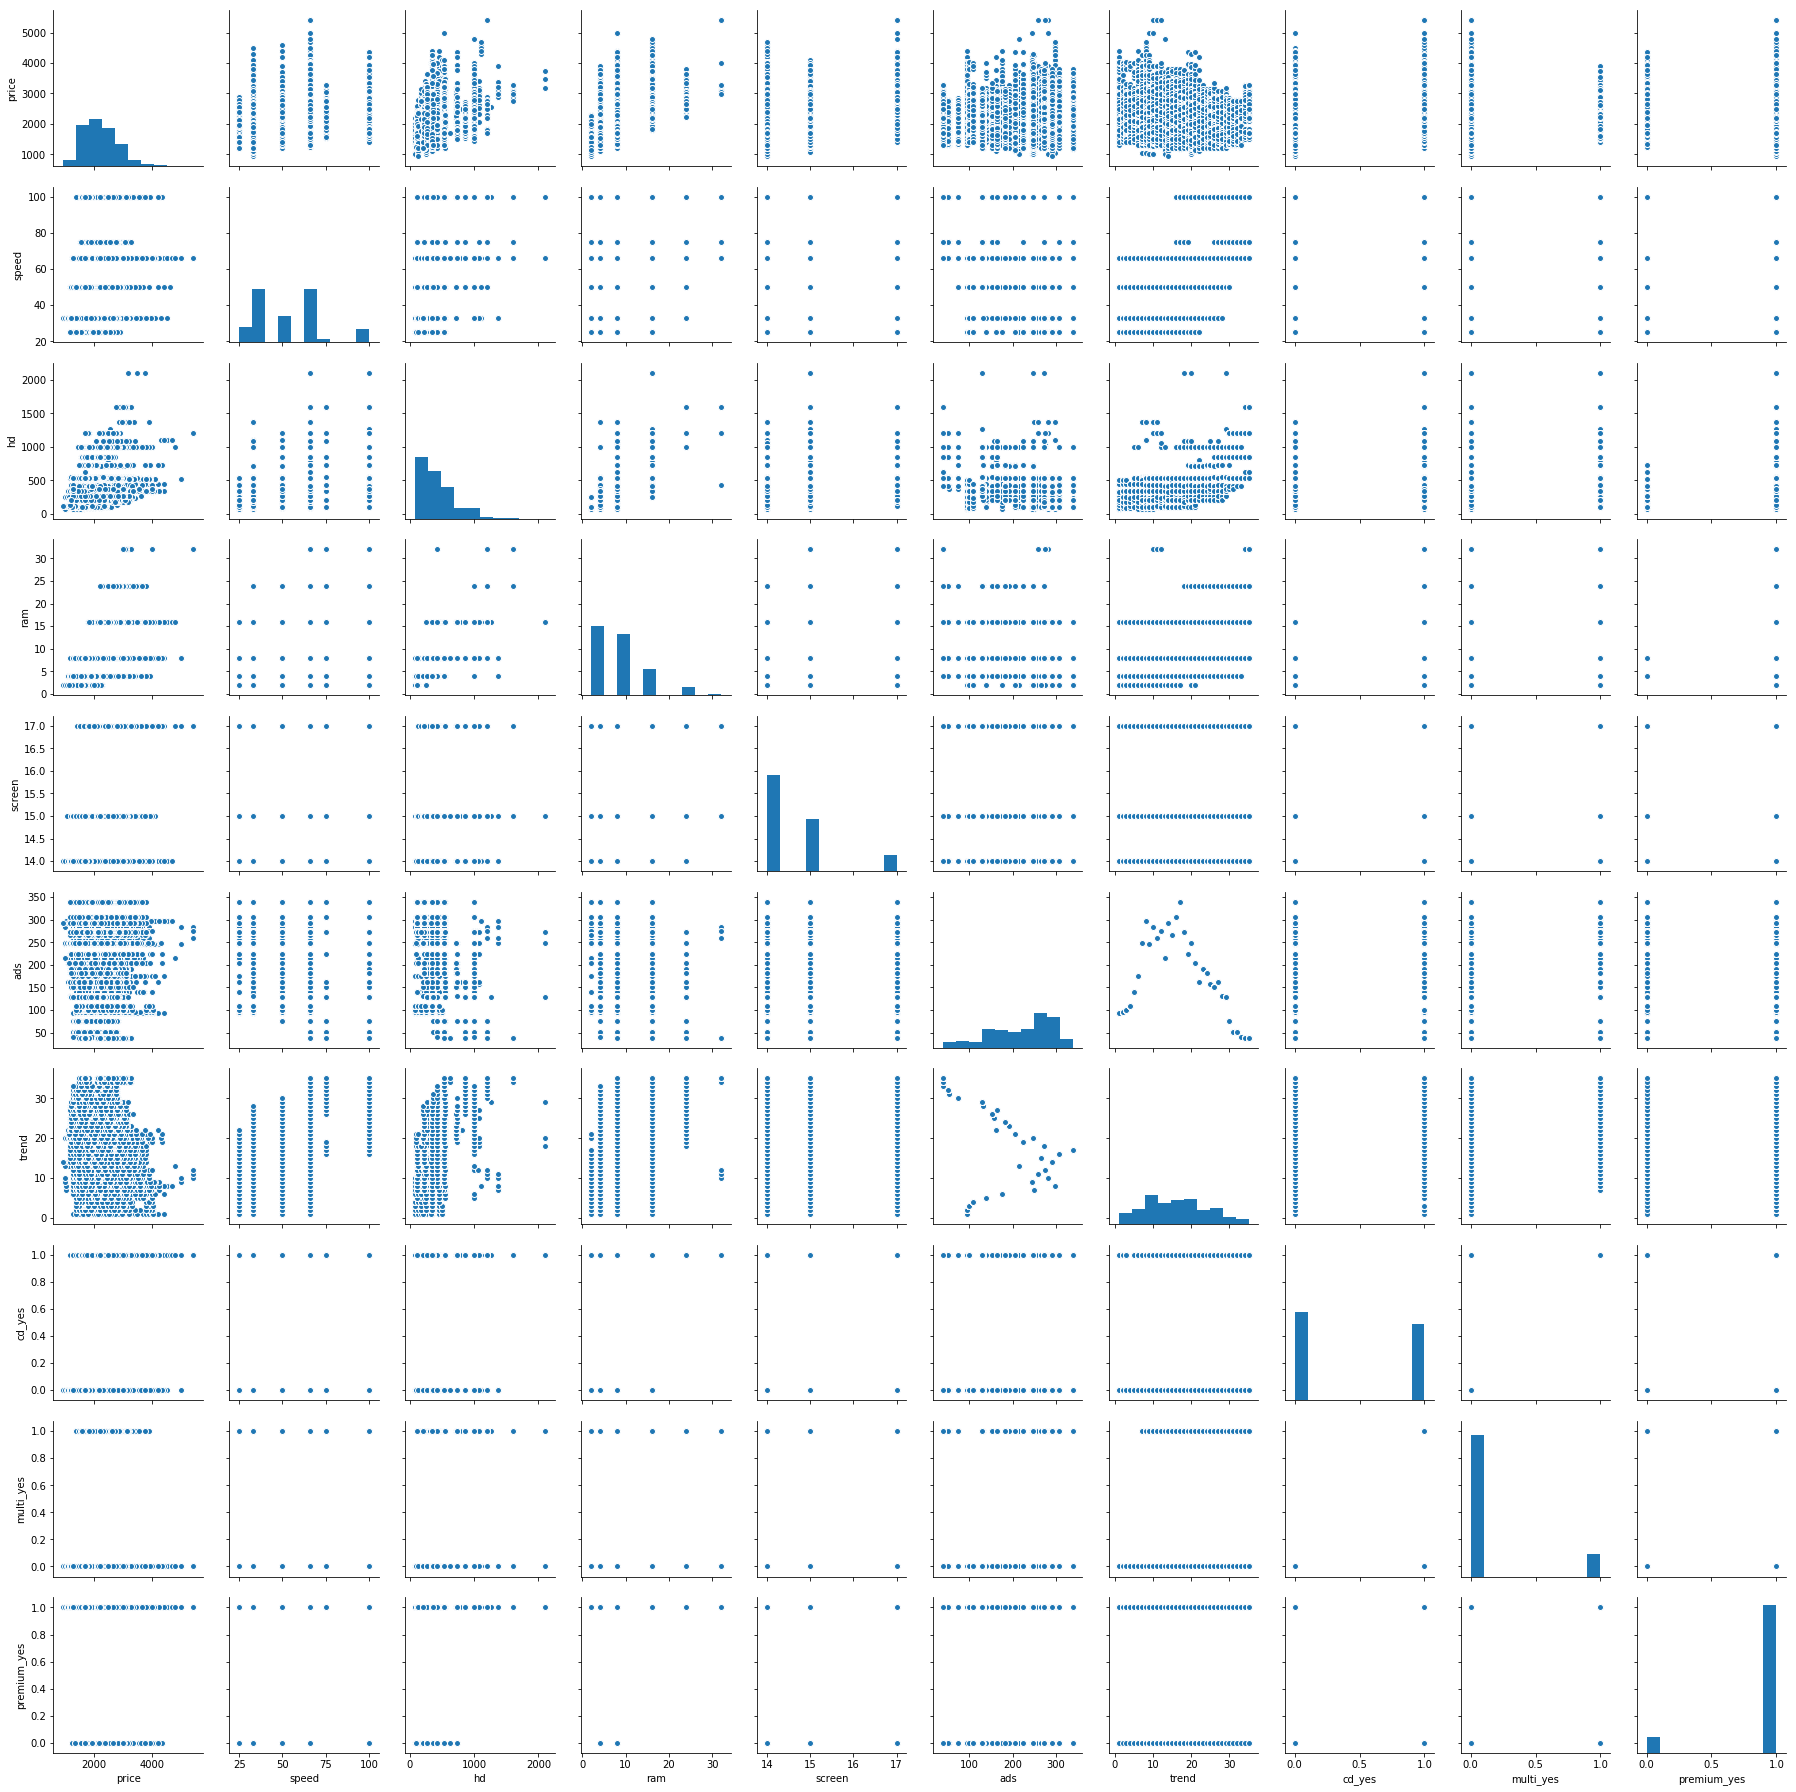

In [9]:
#--------------------- scatter plot diagram --------------------------------------------------
sns.pairplot(new_df)

Text(0.5,1,'data frame correlation')

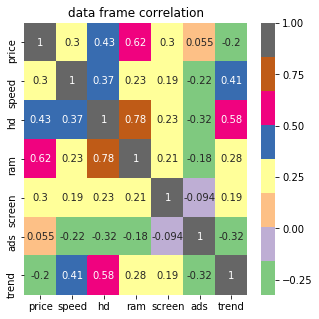

In [10]:
############################ coralation coefficient ##########################################
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot= True, cmap= 'Accent')
plt.title('data frame correlation')


In [11]:
########################### BUILDING MODEL AND ANALYSIS #######################################
import statsmodels.formula.api as smf

In [12]:
first_model = smf.ols('price ~ speed + hd + ram + screen + ads + trend + cd_yes + multi_yes + premium_yes', data= new_df).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:26:25   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     307.9880     60.353      5.103      0.000     189.675     426.301
speed           9.3203      0.185     50.364      0.000       8.958       9.683
hd              0.7818      0.028     28.311      0.000       0.728       0.836
ram            48.2560      1.066     45.265      0.000      46.166      50.346
screen        123.0890      3.999     30.776      0.000     115.249     130.929
ads             0.6573      0.051     12.809      0.000       0.557       0.758
trend         -51.8496      0.629    -82.470      0.000     -53.082     -50.617
cd_yes         60.9167      9.516      6.402      0.000      42.263      79.571
multi_yes     104.3238     11.413      9.141      0.000      81.951     126.697
premium_yes  -509.2247     12.342    -41.259      0.000    -533.420    -485.030
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
ml_speed = smf.ols('price ~ speed', data = new_df).fit()
ml_speed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     623.3
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          3.23e-131
Time:                        16:26:37   Log-Likelihood:                -48418.
No. Observations:                6259   AIC:                         9.684e+04
Df Residuals:                    6257   BIC:                         9.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1789.8539     18.582     96.320      0.000    1753.426    1826.282
speed          8.2621      0.331     24.965      0.000       7.613       8.911
==============================================================================
Omnibus:                      507.676   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.899
Skew:                           0.704   Prob(JB):                    9.28e-146
Kurtosis:                       3.760   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
ml_hd = smf.ols('price ~ hd', data = new_df).fit()
ml_hd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     1421.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.67e-280
Time:                        16:26:47   Log-Likelihood:                -48075.
No. Observations:                6259   AIC:                         9.615e+04
Df Residuals:                    6257   BIC:                         9.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1816.9176     12.569    144.552      0.000    1792.277    1841.558
hd             0.9665      0.026     37.702      0.000       0.916       1.017
==============================================================================
Omnibus:                      541.884   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.624
Skew:                           0.713   Prob(JB):                    4.52e-163
Kurtosis:                       3.913   Cond. No.                         930.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
ml_ram = smf.ols('price ~ ram', data = new_df).fit()
ml_ram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:26:57   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
ml_screen = smf.ols('price ~ screen', data = new_df).fit()
ml_screen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     601.0
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          8.15e-127
Time:                        16:27:10   Log-Likelihood:                -48428.
No. Observations:                6259   AIC:                         9.686e+04
Df Residuals:                    6257   BIC:                         9.687e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -555.5993    113.415     -4.899      0.000    -777.931    -333.267
screen       189.9670      7.749     24.516      0.000     174.777     205.157
==============================================================================
Omnibus:                      473.773   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.233
Skew:                           0.692   Prob(JB):                    4.58e-131
Kurtosis:                       3.620   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
ml_ads = smf.ols('price ~ ads', data = new_df).fit()
ml_ads.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.67
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.58e-05
Time:                        16:27:21   Log-Likelihood:                -48706.
No. Observations:                6259   AIC:                         9.742e+04
Df Residuals:                    6257   BIC:                         9.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2125.9012     22.887     92.888      0.000    2081.035    2170.767
ads            0.4233      0.098      4.321      0.000       0.231       0.615
==============================================================================
Omnibus:                      507.006   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.451
Skew:                           0.709   Prob(JB):                    2.33e-144
Kurtosis:                       3.725   Cond. No.                         729.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
ml_trend = smf.ols('price ~ trend', data = new_df).fit()
ml_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     260.7
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.75e-57
Time:                        16:27:32   Log-Likelihood:                -48588.
No. Observations:                6259   AIC:                         9.718e+04
Df Residuals:                    6257   BIC:                         9.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2454.5238     16.233    151.206      0.000    2422.702    2486.346
trend        -14.7515      0.914    -16.145      0.000     -16.543     -12.960
==============================================================================
Omnibus:                      452.148   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.922
Skew:                           0.673   Prob(JB):                    4.76e-124
Kurtosis:                       3.606   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
ml_cd = smf.ols('price ~ cd_yes', data = new_df).fit()
ml_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     253.5
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           5.44e-56
Time:                        16:27:42   Log-Likelihood:                -48591.
No. Observations:                6259   AIC:                         9.719e+04
Df Residuals:                    6257   BIC:                         9.720e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2112.8120      9.837    214.788      0.000    2093.529    2132.095
cd_yes       229.7936     14.431     15.923      0.000     201.503     258.084
==============================================================================
Omnibus:                      674.403   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              960.116
Skew:                           0.834   Prob(JB):                    3.26e-209
Kurtosis:                       3.948   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
ml_multi = smf.ols('price ~ multi_yes', data = new_df).fit()
ml_multi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.735
Date:                Tue, 18 Jun 2019   Prob (F-statistic):              0.188
Time:                        16:27:55   Log-Likelihood:                -48715.
No. Observations:                6259   AIC:                         9.743e+04
Df Residuals:                    6257   BIC:                         9.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2223.4699      7.914    280.970      0.000    2207.957    2238.983
multi_yes    -27.9132     21.189     -1.317      0.188     -69.451      13.625
==============================================================================
Omnibus:                      502.366   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.992
Skew:                           0.705   Prob(JB):                    9.71e-143
Kurtosis:                       3.720   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
ml_premium = smf.ols('price ~ premium_yes', data = new_df).fit()
ml_premium.summary() # each individual model probability = 0.00

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     41.01
Date:                Tue, 18 Jun 2019   Prob (F-statistic):           1.62e-10
Time:                        16:28:24   Log-Likelihood:                -48695.
No. Observations:                6259   AIC:                         9.739e+04
Df Residuals:                    6257   BIC:                         9.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2361.9346     23.403    100.925      0.000    2316.057    2407.812
premium_yes  -157.7862     24.638     -6.404      0.000    -206.086    -109.486
==============================================================================
Omnibus:                      489.990   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.628
Skew:                           0.696   Prob(JB):                    2.57e-138
Kurtosis:                       3.703   Cond. No.                         6.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

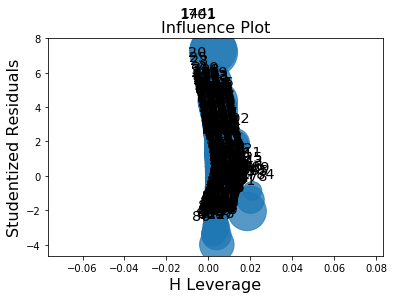

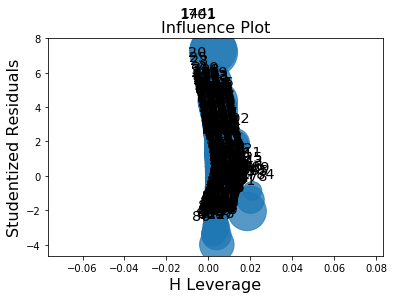

In [23]:
################################ finding influence plot ########################################

import statsmodels.api as sm
sm.graphics.influence_plot(first_model)

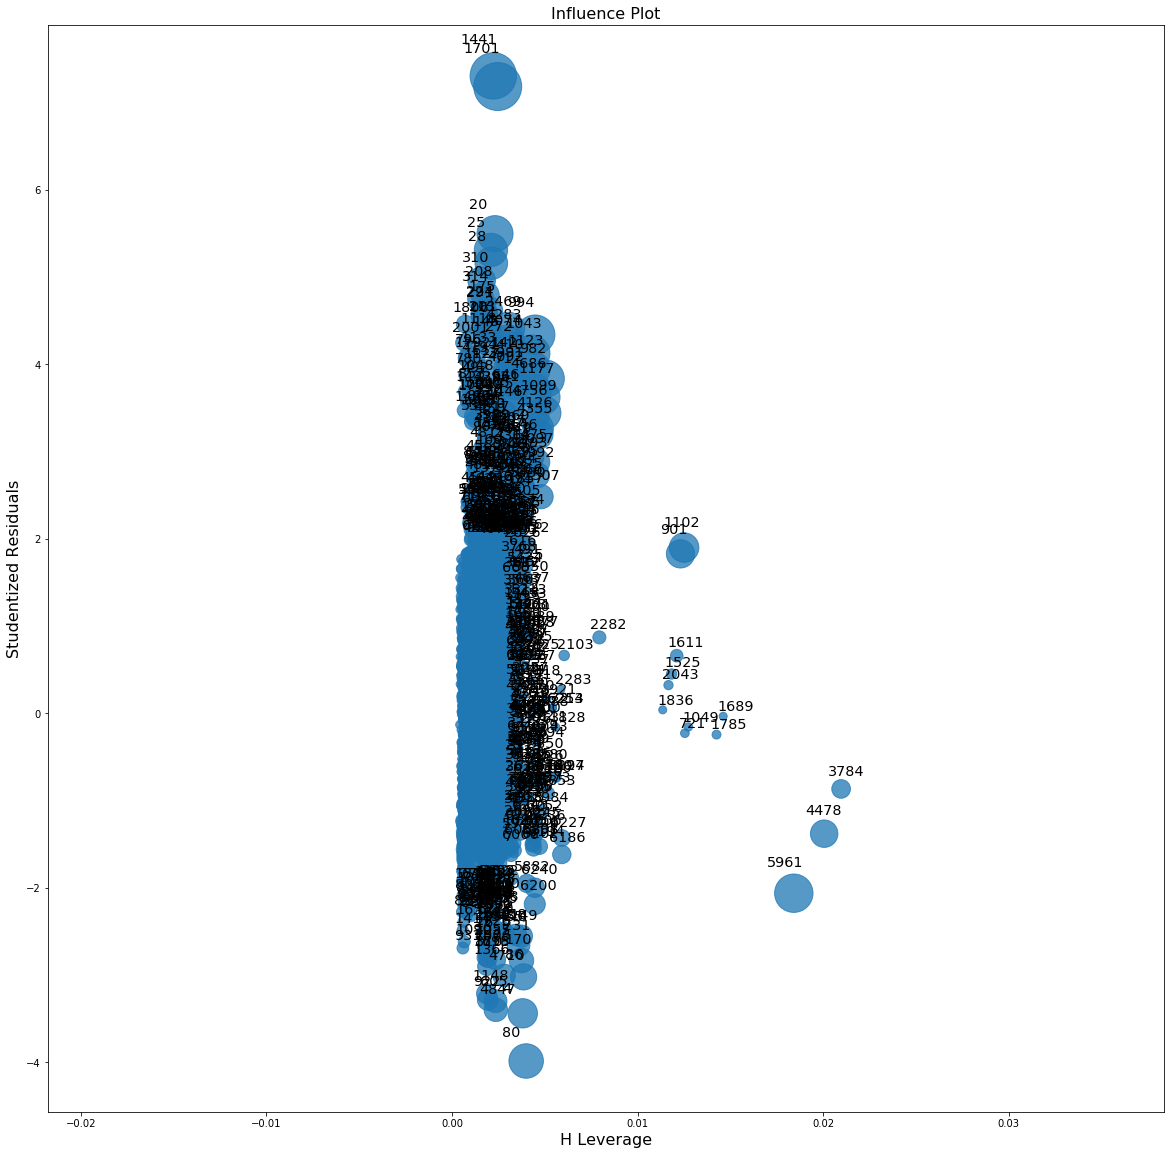

In [24]:
fi , axes = plt.subplots(figsize=(20,20))
fi = sm.graphics.influence_plot(first_model, ax = axes)

In [25]:
# after looking at influence plot it is very clear that it has many influencing points
# trying to drop them an check for new model with improved R-squared value or not

droped_rows = new_df.drop(new_df.index[[3784,4478,5961,1689,1785,721,1049,1836,2043,1525,1611,901,1102,80,1441,1701]])


In [26]:
droped_model = smf.ols('price ~ speed + hd + ram + screen + ads + trend + cd_yes + multi_yes + premium_yes', data = droped_rows).fit()
droped_model.summary()
# on dropping few rows the R-square doesn't change but Adjusted R-square value significantly change with 0.12
# so decided to fo with this model for prediction

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2392.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:29:55   Log-Likelihood:                -43924.
No. Observations:                6243   AIC:                         8.787e+04
Df Residuals:                    6233   BIC:                         8.794e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     309.4175     60.381      5.124      0.000     191.049     427.786
speed           9.3036      0.185     50.261      0.000       8.941       9.666
hd              0.7818      0.028     28.311      0.000       0.728       0.836
ram            48.2644      1.066     45.276      0.000      46.175      50.354
screen        122.8893      4.002     30.710      0.000     115.045     130.734
ads             0.6622      0.051     12.899      0.000       0.562       0.763
trend         -51.7950      0.629    -82.291      0.000     -53.029     -50.561
cd_yes         60.6329      9.522      6.368      0.000      41.967      79.299
multi_yes     104.0616     11.420      9.113      0.000      81.675     126.448
premium_yes  -508.8907     12.349    -41.207      0.000    -533.100    -484.681
==============================================================================
Omnibus:                     1018.465   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3222.386
Skew:                           0.835   Prob(JB):                         0.00
Kurtosis:                       6.098   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
###################### vif calculation #####################################################
re_speed = smf.ols('speed ~ hd + ram + screen + ads + trend + cd_yes + multi_yes + premium_yes', data = droped_rows).fit().rsquared
vif_speed = 1/(1-re_speed)

In [28]:
re_hd = smf.ols('hd~speed+ram+screen+ads+trend+cd_yes+multi_yes+premium_yes', data = droped_rows).fit().rsquared
vif_hd = 1/(1-re_hd)
vif_hd

4.205287882374581

In [29]:
re_ram = smf.ols('ram~speed+hd+screen+ads+trend+cd_yes+multi_yes+premium_yes', data = droped_rows).fit().rsquared
vif_ram = 1/(1-re_ram)
vif_ram

2.9722265529445333

In [30]:
re_screen = smf.ols('screen~speed+hd+ram+ads+trend+cd_yes+multi_yes+premium_yes', data = droped_rows).fit().rsquared
vif_screen = 1/(1-re_screen)
vif_screen

1.0814681125139152

In [31]:
re_ads = smf.ols('ads~speed+hd+ram+screen+trend+cd_yes+multi_yes+premium_yes', data = droped_rows).fit().rsquared
vif_ads = 1/(1-re_ads)
vif_ads


1.2170528710368531

In [32]:
re_speed = smf.ols('trend~speed+hd+ram+screen+ads+cd_yes+multi_yes+premium_yes', data = droped_rows).fit().rsquared
vif_speed = 1/(1-re_speed)
vif_speed


2.0238146830098476

In [33]:
re_cd = smf.ols('cd_yes~speed+hd+ram+screen+ads+trend+multi_yes+premium_yes', data = droped_rows).fit().rsquared
vif_cd = 1/(1-re_cd)
vif_cd

1.8587184731765365

In [34]:
re_multi = smf.ols('multi_yes~speed+hd+ram+screen+ads+trend+cd_yes+premium_yes', data = droped_rows).fit().rsquared
vif_multi = 1/(1-re_multi)
vif_multi

1.2901033218228635

In [35]:
re_premium = smf.ols('premium_yes~speed+hd+ram+screen+ads+trend+cd_yes+multi_yes', data = droped_rows).fit().rsquared
vif_premium = 1/(1-re_premium)
vif_premium

1.1096086532358398

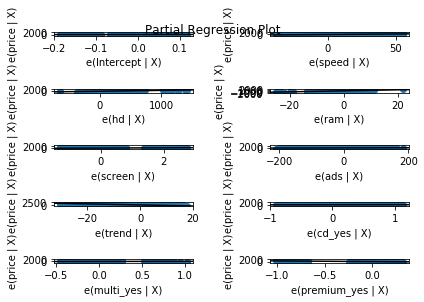

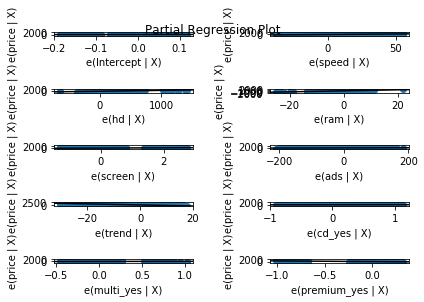

In [36]:
################################# partial regression plot############################################################

sm.graphics.plot_partregress_grid(droped_model)
# it seems that need not required to drop

In [37]:
################################ prediction model##################################
price_predict = droped_model.predict(droped_rows[['speed','hd','ram','screen','ads','trend','cd_yes','multi_yes','premium_yes']])
price_predict

Unnamed: 0
1       2019.621582
2       2001.430703
3       2212.875871
4       2791.934776
5       2876.499510
6       3183.517894
7       2150.619483
8       2159.591689
9       2546.907135
10      2476.738902
11      2480.362064
12      2695.764533
13      2291.302950
14      2341.681627
15      2548.470802
16      2291.302950
17      2001.430703
18      2318.577916
19      2349.851262
20      2884.968275
21      2133.141964
22      2440.160348
23      2802.070810
24      2722.517424
25      2736.110877
26      1997.521535
27      2133.141964
28      2577.949891
29      2876.499510
30      2723.128711
           ...     
6230    1968.323683
6231    3190.180940
6232    2214.102205
6233    1146.936129
6234    1463.258101
6235    1858.463094
6236    3656.439699
6237    2873.858968
6238    3257.135876
6239    1146.936129
6240    3643.250863
6241    1463.258101
6242    2284.645655
6243    3048.464045
6244    2940.813904
6245    3410.661177
6246    2628.080446
6247    1146.936129
6248    1

In [38]:
############################### getting residual of dataframe ##########################

residual = pd.DataFrame(pd.Series(droped_rows['price'] - price_predict))
residual
residual.mean() # close to zero
# residual error is given by predicted - actual dataset


0    7.898240e-12
dtype: float64

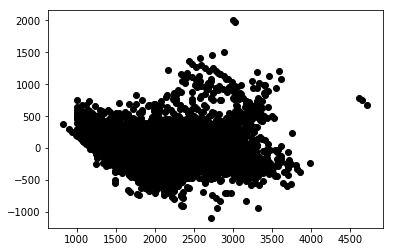

In [39]:
plt.scatter(price_predict,residual, color = 'black')

In [40]:
stdresidual = pd.DataFrame(droped_model.resid_pearson)
stdresidual

,0
0,-1.891485
1,-0.749989
2,-2.244823
3,-3.425803
4,1.520466
5,1.858280
6,-1.564496
7,-0.597983
8,-1.169530
9,0.356995


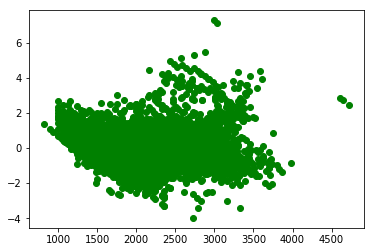

In [41]:
plt.scatter(price_predict, stdresidual, color = 'green')


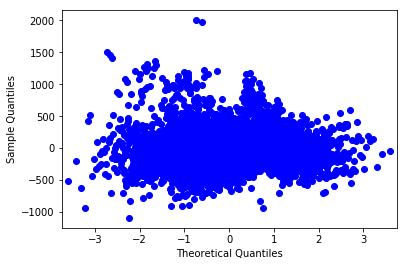

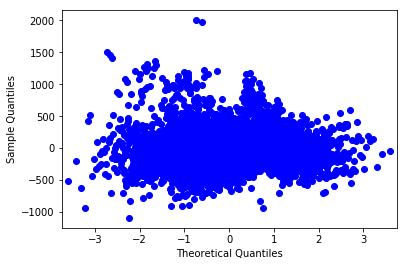

In [42]:
sm.qqplot(residual)